# Transformations
### **Translations and Rotations**

- translation
- transformation
- transpose
- flipping

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis ==False:
        plt.axis('off')
    plt.show()

In [74]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = get_random_img_path(skip=["flickr", "weather", "gem"])
IMG_PATH    

'../../res/img/Cheetahs/3054d68c25d49d54.jpg'

---
### Loading data

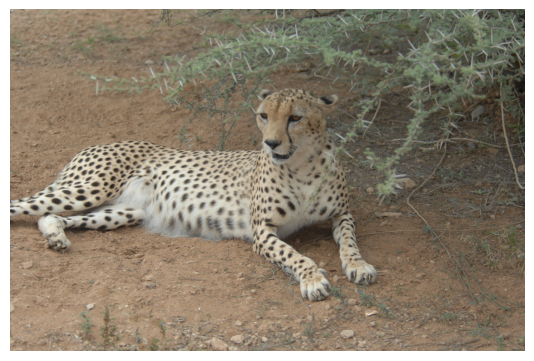

In [75]:
img = cv2.imread(IMG_PATH)
imshow(img)

---
### Translation

Movement in top, down, left or right

```python
cv2.warpAffine(img, Translation-Matrix, (width, height))
```

```python
T = [
        [1, 0, Tx],
        [0, 1, Ty]
    ]
```

Tx: X-Axis shift<br>
Ty: Y-Axis shift

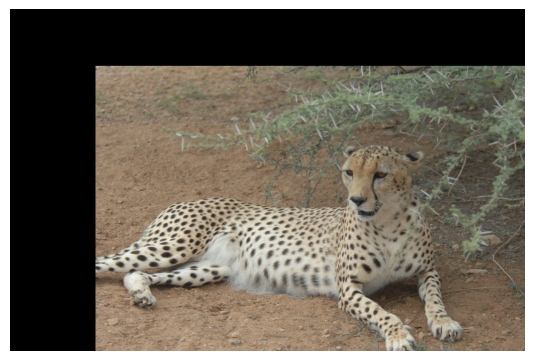

In [78]:
height = img.shape[0]
width = img.shape[1]

x_shift = width//6
y_shift = height//6

T = np.float32([[1, 0, x_shift],
                [0, 1, y_shift]])

img_translated = cv2.warpAffine(img, T, (width, height))
imshow(img_translated)

---
### Rotations

Create a rotationmatrix with following method and use it with the warpAffine method.

```python
cv2.getRotationMatrix2D(center coordinates, angle of rotation, scale)
```

Scaling so that the image is also visible when rotating.

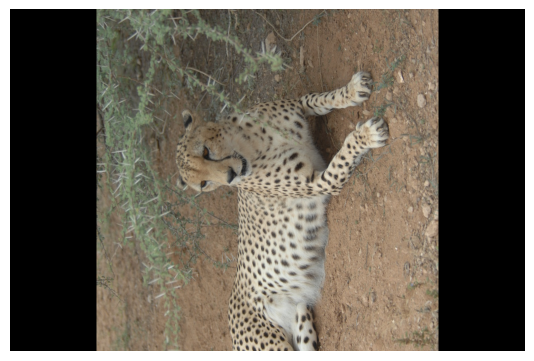

In [79]:
height = img.shape[0]
width = img.shape[1]

T = cv2.getRotationMatrix2D((width//2, height//2), 90, 1)

img_rotated = cv2.warpAffine(img, T, (width, height))
imshow(img_rotated)

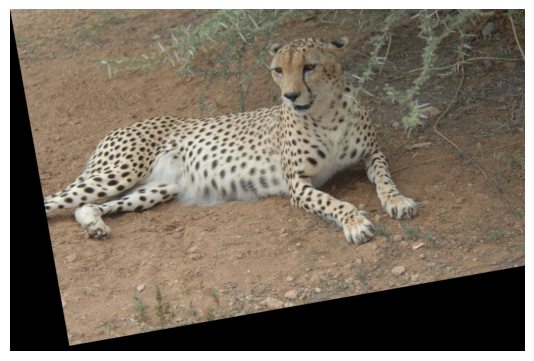

In [87]:
height = img.shape[0]
width = img.shape[1]

T = cv2.getRotationMatrix2D((0, 0), 10, 1)

img_rotated = cv2.warpAffine(img, T, (width, height))
imshow(img_rotated)

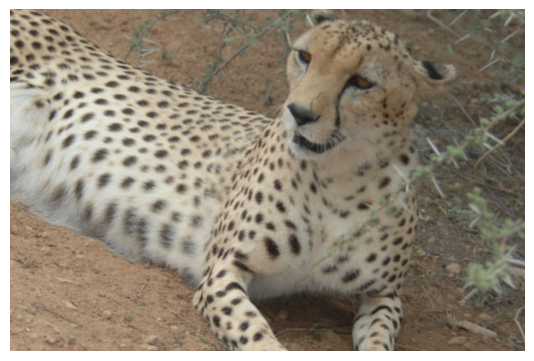

In [85]:
height = img.shape[0]
width = img.shape[1]

T = cv2.getRotationMatrix2D((width//2, height//2), -20, 2)

img_rotated = cv2.warpAffine(img, T, (width, height))
imshow(img_rotated)

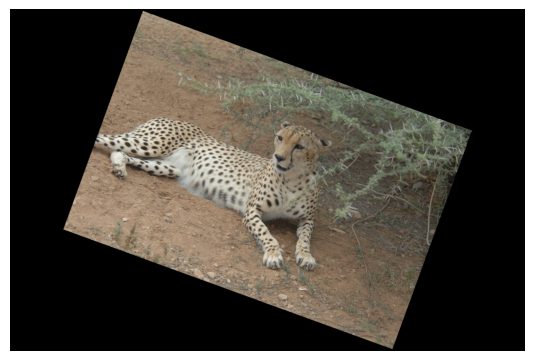

In [100]:
height = img.shape[0]
width = img.shape[1]

T = cv2.getRotationMatrix2D((width//2, height//2), -20, 0.68)

img_rotated = cv2.warpAffine(img, T, (width, height))
imshow(img_rotated)

---
### Transpose

Rotate the image 90 degree.

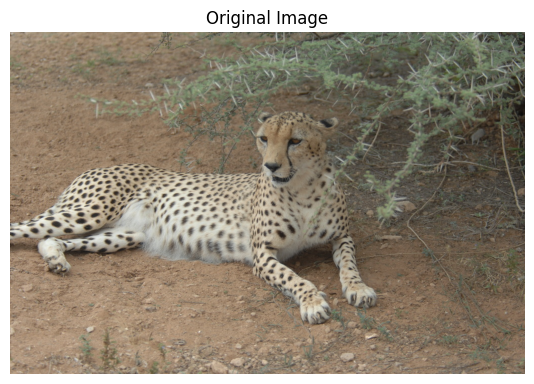

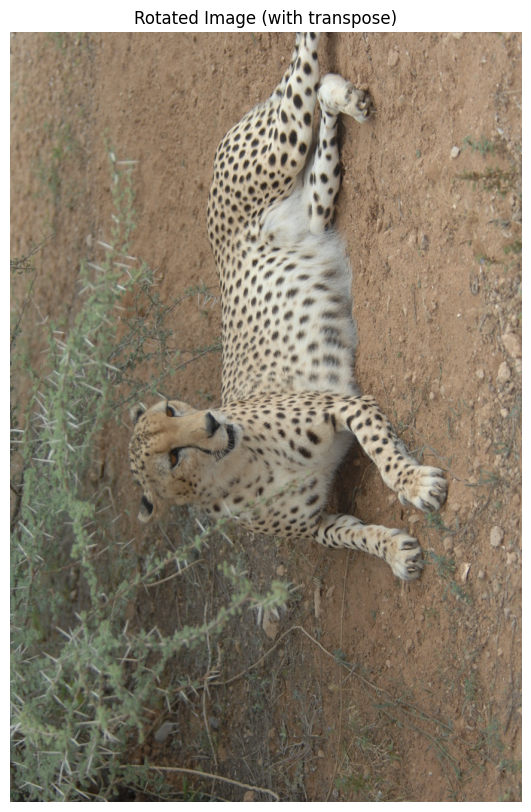

In [102]:
imshow(img, "Original Image")

img_rotated = cv2.transpose(img)
imshow(img_rotated, "Rotated Image (with transpose)")

---
### Flipping

Horizontal flip

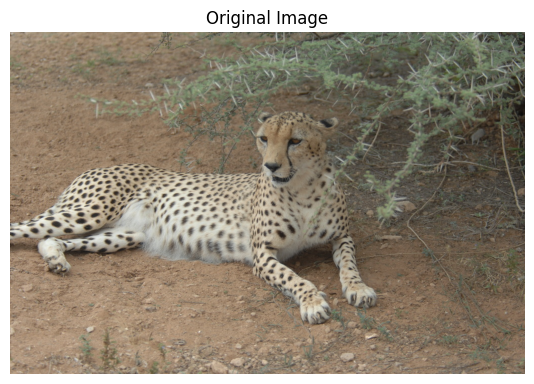

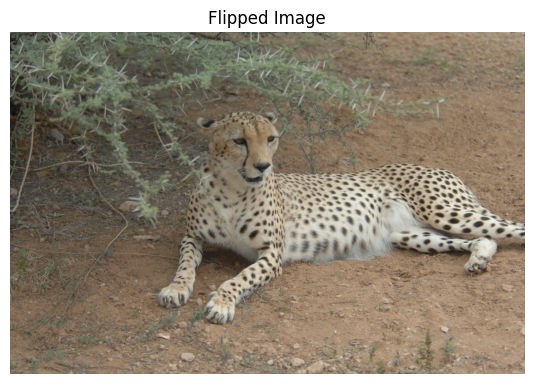

In [105]:
imshow(img, "Original Image")

img_flipped = cv2.flip(img, 1)
imshow(img_flipped, "Flipped Image")

---